In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Loading the data
weight_data = pd.read_csv('C:\\Users\\USER\\Documents\\Obesity Classification.csv')

In [4]:
weight_data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
weight_data.shape

(108, 7)

In [6]:
weight_data.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [7]:
weight_data.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [8]:
# one hot encoding
weight_data.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12200\4110918672.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weight_data.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)


In [9]:
# Label encoding
weight_data.replace({'Label': {'Underweight': 0, 'Normal Weight': 1, 'Overweight': 2, 'Obese': 3}}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12200\4250970597.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weight_data.replace({'Label': {'Underweight': 0, 'Normal Weight': 1, 'Overweight': 2, 'Obese': 3}}, inplace=True)


In [10]:
weight_data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,0,175,80,25.3,1
1,2,30,1,160,60,22.5,1
2,3,35,0,180,90,27.3,2
3,4,40,1,150,50,20.0,0
4,5,45,0,190,100,31.2,3


<function matplotlib.pyplot.show(close=None, block=None)>

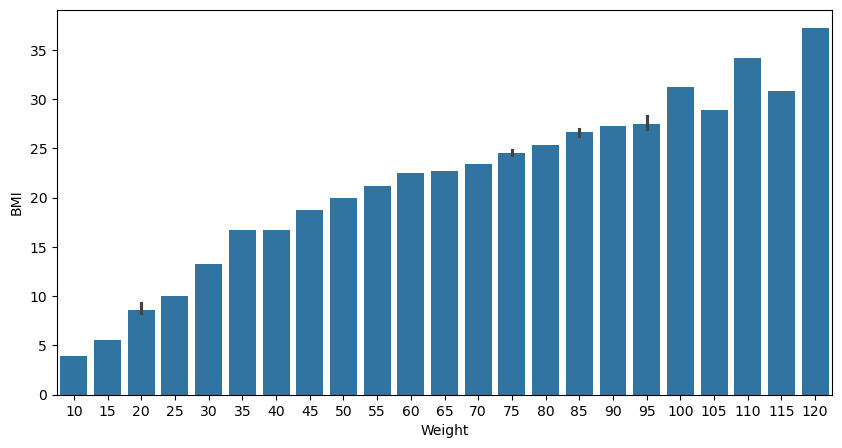

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='Weight', y='BMI', data= weight_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

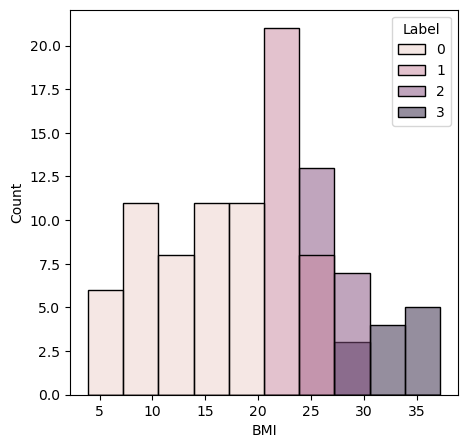

In [12]:
plt.figure(figsize=(5,5))
sns.histplot(data=weight_data, x = 'BMI', hue = 'Label', bins = 10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

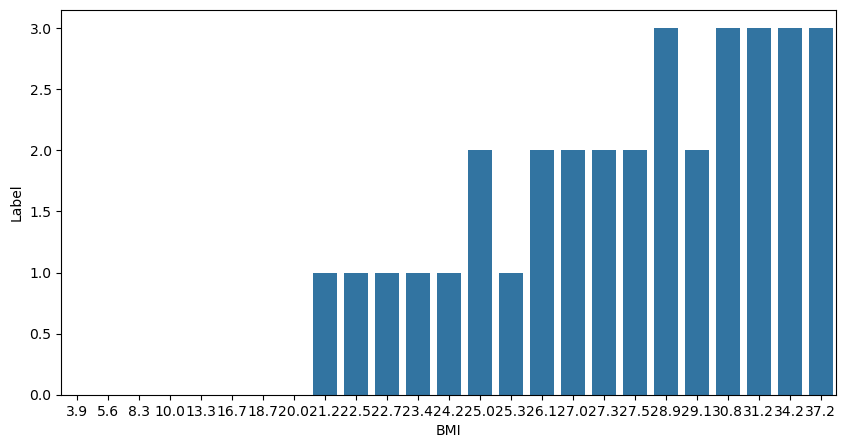

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x='BMI', y='Label', data= weight_data)
plt.show

In [14]:
correlation = weight_data.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

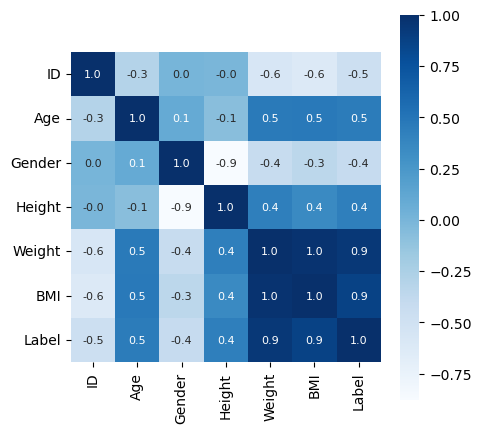

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show

In [28]:
# Splitting data and label
X = weight_data.drop(columns = ['ID', 'Label'], axis=1)
Y = weight_data['Label']

In [29]:
print(X)
print(Y)

     Age  Gender  Height  Weight   BMI
0     25       0     175      80  25.3
1     30       1     160      60  22.5
2     35       0     180      90  27.3
3     40       1     150      50  20.0
4     45       0     190     100  31.2
..   ...     ...     ...     ...   ...
103   11       0     175      10   3.9
104   16       1     160      10   3.9
105   21       0     180      15   5.6
106   26       1     150      15   5.6
107   31       0     190      20   8.3

[108 rows x 5 columns]
0      1
1      1
2      2
3      0
4      3
      ..
103    0
104    0
105    0
106    0
107    0
Name: Label, Length: 108, dtype: int64


In [30]:
# Splitting into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y,random_state = 1)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(108, 5) (97, 5) (11, 5)


In [32]:
model = RandomForestClassifier()

In [33]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("prediction accuracy on x_test is:", test_data_accuracy)

prediction accuracy on x_test is: 1.0


In [35]:
input_data = (23,1,160,50,20)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==3):
    print('Patient is obese')
else:
    print('Patient is not obese')

[0]
Patient is not obese


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
# using xgbclassifier to avoid overfitting
model = XGBClassifier(n_estimators=100, objective='multi:softmax', eval_metric='mlogloss', use_label_encoder=False)


In [24]:
model.fit(X_train, Y_train)

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:00:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [39]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print(test_data_accuracy)

1.0


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(multi_class='ovr', solver='liblinear')

In [42]:
model.fit(X_train, Y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [43]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on test data is:', test_data_accuracy)

Accuracy on test data is: 1.0


---

--- Conclusion shows that the relationship between the data and label is very strong and simple--
